<a href="https://colab.research.google.com/github/AhmedWael2000/Linear-Regression/blob/main/Multivariant_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(0,100,size=(1000,3)),columns=['X1','X2','X3'])
df.head()

,X1,X2,X3
0,22,88,75
1,7,34,82
2,41,99,54
3,26,27,91
4,73,94,27


In [ ]:
df['1']=1
df['Y']=5*df['X1'] + 3*df['X2'] + 1.5*df['X3'] + 6

df.head()

,X1,X2,X3,1,Y
0,22,88,75,1,492.5
1,7,34,82,1,266.0
2,41,99,54,1,589.0
3,26,27,91,1,353.5
4,73,94,27,1,693.5


In [ ]:
df.shape

(1000, 5)

### implementing Z score normalization

In [ ]:
def z_score_norm(col):
    mean=col.mean()
    sigma=col.std()
    
    col_norm =(col - mean)/sigma  
    
    return col_norm,sigma,mean

### Implementing normalization of dividing by Max

In [ ]:
def div_by_max(col):
    max_=col.max()
    return col/max_

In [ ]:
#normalizing df deviding by max for each column
for col in df.columns:
    df[col]=div_by_max(df[col])    

df.head()

,X1,X2,X3,1,Y
0,0.222222,0.888889,0.757576,1.0,0.533875
1,0.070707,0.343434,0.828283,1.0,0.288347
2,0.414141,1.000000,0.545455,1.0,0.638482
3,0.262626,0.272727,0.919192,1.0,0.383198
4,0.737374,0.949495,0.272727,1.0,0.751762


In [ ]:
df.describe()

,X1,X2,X3,1,Y
count,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,0.501051,0.493030,0.493404,1.0,0.513518
std,0.291946,0.297157,0.295684,0.0,0.192748
min,0.000000,0.000000,0.000000,1.0,0.039024
25%,0.242424,0.232323,0.232323,1.0,0.375339
50%,0.515152,0.484848,0.484848,1.0,0.514634
75%,0.747475,0.757576,0.757576,1.0,0.655962
max,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2','X3','1']],df['Y'],test_size=0.30)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((700, 4), (700,), (300, 4), (300,))

## Let's Calculate W using Least Square Method
$W= (X^{T}.X)X^{T}.Y$

In [ ]:
X=np.array(X_train)
Y=np.array(y_train)
W= np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(Y)
W

array([0.53658537, 0.32195122, 0.16097561, 0.00650407])

In [ ]:
y_pred=X_test.dot(W)
y_pred.head() ,y_test.head()

(690    0.331707
 637    0.760976
 965    0.584282
 393    0.441192
 416    0.227642
 dtype: float64, 690    0.331707
 637    0.760976
 965    0.584282
 393    0.441192
 416    0.227642
 Name: Y, dtype: float64)

## Cost Function: 
### Mean Square Error: $\frac{1}{2m} \sum\limits _{i=1} ^{m}{(\hat{y(i)}-y(i))^{2}} $

In [ ]:
def cost_fun(y_pred,y_test):
    y_pred=np.array(y_pred)
    y_test=np.array(y_test)
    e=0
    n=y_pred.size
    for i in range(n):
        e+=(y_pred[i]-y_test[i])**2
    return e/(2*n)    

In [ ]:
cost_fun(y_pred,y_test)


6.8322027739396926e-31

Accuracy


In [ ]:
1-cost_fun(y_pred,y_test)

1.0

## Gradient Decent for Multivariable Regression
## $\theta _{new}=\theta_{old} - \alpha \frac{2}{m}X^{T}(X.\theta-Y)$

In [ ]:
def gradient_decent(theta,x,y,LR=0.01,iterations=1000):
    
    cost_hist=[]
    theta_hist=[]
    iter_list=[]
    m = len(x)
    X_train=np.array(x)
    y_train=np.array(y)
    
    for i in range(iterations):
        dw = 2/m * X_train.T.dot(X_train.dot(theta) -y_train)
        theta=theta-LR*dw
        
        y_pred = X_train.dot(theta)
        cost_value=cost_fun(y_pred,y_train)
       
        
        cost_hist.append(cost_value)
        iter_list.append(i)
        theta_hist.append(theta)
        
        if len(cost_hist)>2 and cost_hist[-1]>cost_hist[-2]:
            LR/=10
                
            
        
        if i%(iterations/10) == 0:
            print(f"Iteration {i:4}: Cost {cost_hist[-1]:0.2e} w:{theta:} accuracy: {(1-cost_hist[-1])*100} ")
        
    return theta, cost_hist, theta_hist,iter_list
    
  

In [ ]:
theta, cost_hist, theta_hist,iter_list= gradient_decent([1,1,2,5],X_train,y_train,LR=0.01,iterations=1000)
theta 

Iteration    0: Cost 1.96e+01 w:[0.93470606 0.93442208 1.93340844 4.87073995] accuracy: -1860.7201878171484 
Iteration  100: Cost 1.36e-01 w:[-0.67193426 -0.69708274  0.13224563  1.35953561] accuracy: 86.35144958756206 
Iteration  200: Cost 9.62e-02 w:[-0.57453853 -0.62066707  0.04184973  1.14980798] accuracy: 90.3839332841933 
Iteration  300: Cost 7.59e-02 w:[-0.44891071 -0.51323042  0.00951893  1.03976839] accuracy: 92.4100852762438 
Iteration  400: Cost 6.02e-02 w:[-0.33773836 -0.41791316 -0.01167664  0.94225363] accuracy: 93.9814952847509 
Iteration  500: Cost 4.79e-02 w:[-0.24012271 -0.33417722 -0.02501379  0.85399177] accuracy: 95.20784234695647 
Iteration  600: Cost 3.83e-02 w:[-0.15428893 -0.26054511 -0.03222197  0.77405489] accuracy: 96.17006734061339 
Iteration  700: Cost 3.07e-02 w:[-0.07868983 -0.19571558 -0.03468133  0.70165706] accuracy: 96.92884637937675 
Iteration  800: Cost 2.47e-02 w:[-0.01199724 -0.13856458 -0.03350919  0.63608767] accuracy: 97.52996092375406 
Iterat

array([ 0.09858482, -0.04396188, -0.02376722,  0.5234319 ])

Text(0.5, 0, '# of iteration')

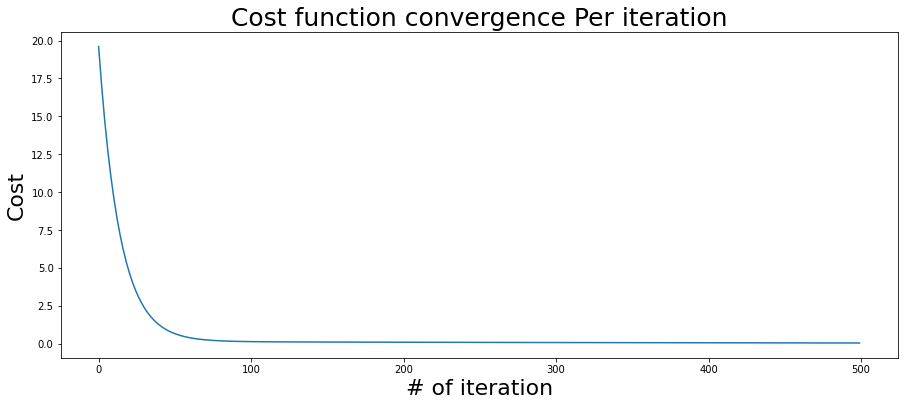

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
# zooming only on the last 500 iterations
plt.plot(iter_list[:500],cost_hist[:500])
plt.title("Cost function convergence Per iteration",{"size":25})
plt.ylabel('Cost',{"size":22})
plt.xlabel('# of iteration',{"size":22})

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
house=pd.read_csv("/content/drive/MyDrive/datasets/USA_Housing.csv")
house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
house.drop("Address",inplace=True,axis=1)
house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


# using Z Score Normalization

In [ ]:
sigmas,means=dict(),dict()
for col in house.columns:
    house[col],sigmas[col],means[col]=z_score_norm(house[col])
    
house.head()    

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028557,-0.296897,0.021272,0.088053,-1.317467,-0.490032
1,1.000708,0.025899,-0.255481,-0.722229,0.403959,0.775431
2,-0.684561,-0.112292,1.516092,0.930747,0.072403,-0.490162
3,-0.491450,1.221450,-1.392938,-0.584481,-0.186716,0.080835
4,-0.806992,-0.944739,0.846657,0.201493,-0.988289,-1.702348


In [ ]:
x=house.iloc[:,:-1]
x["1"]=1
y=house['Price']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((3500, 6), (3500,), (1500, 6), (1500,))

In [ ]:
theta_h, cost_hist_h, theta_hist_h,iter_list_h= gradient_decent([1,2,3,4,5,6],X_train,y_train,LR=0.01,iterations=500)
theta_h 

Iteration    0: Cost 4.27e+01 w:[0.99335779 1.97018889 2.91070343 3.89784337 4.91714541 5.88100163] accuracy: -4170.843078497839 
Iteration   50: Cost 4.88e+00 w:[0.77818996 1.02537138 0.69177326 1.16725951 2.21121831 2.16592952] accuracy: -388.0208670734523 
Iteration  100: Cost 6.83e-01 w:[0.69421854 0.67030355 0.27681024 0.4319662  1.12792465 0.80100586] accuracy: 31.660633210909626 
Iteration  150: Cost 1.36e-01 w:[0.66292319 0.53819004 0.2398585  0.19762172 0.70068594 0.29684541] accuracy: 86.42804434392703 
Iteration  200: Cost 5.62e-02 w:[0.65211898 0.48938671 0.26695723 0.10516078 0.53347144 0.10979632] accuracy: 94.38015644437154 
Iteration  250: Cost 4.34e-02 w:[0.64892413 0.47147783 0.29459984 0.06133578 0.46822381 0.04009845] accuracy: 95.66208537680707 
Iteration  300: Cost 4.10e-02 w:[0.64834473 0.4649583  0.31370562 0.03810988 0.44275249 0.01399896] accuracy: 95.9005340210776 
Iteration  350: Cost 4.05e-02 w:[0.64853313 0.46261247 0.32563479 0.02511718 0.43277247 0.00416

array([ 0.64932504,  0.46141142,  0.33951382,  0.01091925,  0.42663059,
       -0.00157328])

# Ploting Cost Function to See How it Converges

Text(0.5, 0, '# of iteration')

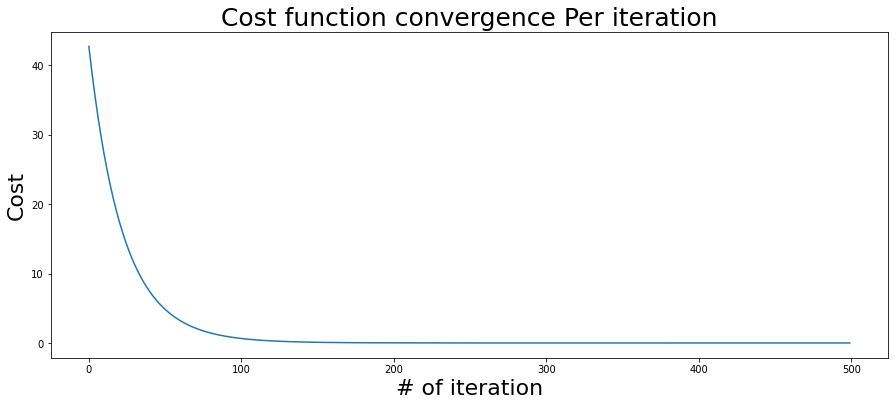

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(iter_list_h,cost_hist_h)
plt.title("Cost function convergence Per iteration",{"size":25})
plt.ylabel('Cost',{"size":22})
plt.xlabel('# of iteration',{"size":22})

### Final Cost Function 

In [ ]:
y_pred=X_test.dot(theta_h)
print(f"cost: {cost_fun(y_pred,y_test):0.3e}")

cost: 4.272e-02


### Accuracy of normalized model

In [ ]:
1-cost_fun(y_pred,y_test)

0.9572836121494118